In [36]:
import re
import itertools
from __future__ import print_function
import pandas as pd
import datetime as dt
import numpy as np
import nltk
import string
import scipy.sparse as sparse
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

re_spaces = re.compile(r'\s+')

from mpl_toolkits.mplot3d import axes3d
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import metrics
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.cross_validation import StratifiedKFold
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import recall_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ModuleNotFoundError: No module named 'statsmodels'

In [18]:
def cleaned_reviews(x):
    return(''.join(re.sub('[^a-zA-Z]', ' ', x).replace(':',' ').lower().strip().replace('\r',' ').replace('!',' ')))


In [19]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

In [20]:
def noun_chunk(sentence):
    nlp = en_core_web_sm.load()
    doc = nlp(sentence)
    for t in doc:
        if t.pos_ == 'NOUN':
            noun_token = [t for t in doc if t.pos_ == 'NOUN'][0]
            if noun_token.children.pos_ == 'ADJ':
                adj_token = [t for t in noun_token.children if t.pos_ == 'ADJ'][0]        
                word = adj_token.text + '_' + noun_token.text
                sentence = sentence.replace(adj_token.text,'').replace(noun_token.text, word)
            else:
                sentence = sentence
    
    return sentence

# Reading File in Pandas

In [3]:
table_data = pd.read_csv('C:/Users/ivyfe/PycharmProjects/660D Group 2/BIA660D_Group_2_Project/Collect_all_data.csv')

In [4]:
del table_data['Unnamed: 0']

Modifying file for Data Visualization

In [5]:
df2 = table_data.copy()

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32604 entries, 0 to 32603
Data columns (total 4 columns):
Helpfullness    23335 non-null object
Ratings         32598 non-null object
Reviews         32594 non-null object
Title           32596 non-null object
dtypes: object(4)
memory usage: 1019.0+ KB


In [7]:
df2

,Helpfullness,Ratings,Reviews,Title
0,\r\n 30 people found this helpful.\r\n,1.0 out of 5 stars,"Cans sound fine, but the AKG branded audio cab...","Cans sound fine, but poor product quality"
1,NaN,5.0 out of 5 stars,"I bought these for my Futaba Sakura cosplay, b...",Love these!
2,NaN,5.0 out of 5 stars,"Holy cow, what a set of cans. These are some n...",Affordable headphones offering great sound qua...
3,\r\n 6 people found this helpful.\r\n,1.0 out of 5 stars,Love this headphone but the left side is loude...,High failure rate
4,\r\n 8 people found this helpful.\r\n,5.0 out of 5 stars,Sound leakage - nil/mildSound Isolation - Epic...,"Excellent craftsmanship, sound and design hits..."
5,\r\n 2 people found this helpful.\r\n,3.0 out of 5 stars,Sounds impeccable. Bowers and Wilkins P7 Wirel...,"Great sound, but 2 issues"
6,\r\n 3 people found this helpful.\r\n,5.0 out of 5 stars,Sound:Very clear sharp and decent bass. I was...,Incredible sound
7,\r\n One person found this helpful.\r\n,3.0 out of 5 stars,I have an unfair bias towards AKG headphones b...,Needs Track Skipping Controls & Asistant Activ...
8,NaN,5.0 out of 5 stars,"A couple of tries, or more, is all to often th...","Flawless Bluetooth pairing, comfortable, and e..."
9,\r\n One person found this helpful.\r\n,5.0 out of 5 stars,Definitely more open sounding than any other c...,Sound is incredible!


In [8]:
df2['Ratings'] = df2['Ratings'].apply(lambda x: str(x).split()[0]).apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [9]:
df2['Helpfullness'] = df2['Helpfullness'].apply(lambda x: (re.sub('[^0-9]', ' ', str(x))))

In [10]:
df2['Helpfullness'] = df2['Helpfullness'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [11]:
df2['Helpfullness'] = df2['Helpfullness'].replace(np.nan, 0.0)

In [12]:
df2['Helpfullness'] = df2['Helpfullness'].apply(lambda x: int(x))

In [13]:
#df2.sort_index()

In [14]:
df2['Length_Reviews'] = df2['Reviews'].apply(lambda x : len(str(x)))

In [15]:
df2['Length_Title'] = df2['Title'].apply(lambda x : len(str(x)))

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32604 entries, 0 to 32603
Data columns (total 6 columns):
Helpfullness      32604 non-null int64
Ratings           31470 non-null float64
Reviews           32594 non-null object
Title             32596 non-null object
Length_Reviews    32604 non-null int64
Length_Title      32604 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.5+ MB


In [21]:
df2['Reviews'] = df2['Reviews'].apply(lambda x: cleaned_reviews(str(x)))

In [22]:
df2['Title'] = df2['Title'].apply(lambda x: cleaned_reviews(str(x)))

In [76]:
#df2

# Exploratory Data Analysis

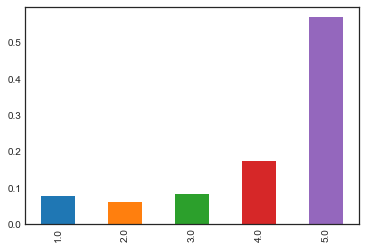

In [37]:
(df2['Ratings'].value_counts()/len(df2)).sort_index().plot.bar()

60+% of verified customer gave 5 stars to the product.Around 15% gave 4 stars and rest(15%) gave less than 3. That implies product features have really positive customer satisfaction.

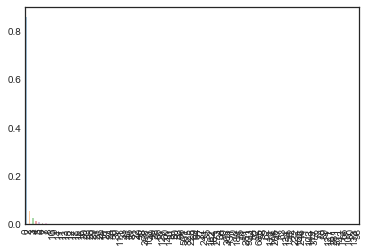

In [38]:
(df2['Helpfullness'].value_counts()/len(df2)).plot.bar(alpha = 0.4)

In [23]:
def helpfulness_section(x):
        if x == 0:
            return 'No Indication'
        elif x < 3:
            return 'Unhelpful'
        elif x < 10:
            return 'Helpful'
        elif x > 10:
            return 'Very Helpful'

In [24]:
df2['Comment_section'] = df2['Helpfullness'].apply(lambda x: helpfulness_section(x))

Text(0.5,1,'Relative Proportion of Helpfulness')

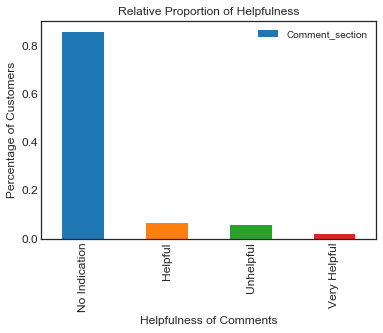

In [41]:
ax = (df2['Comment_section'].value_counts()/len(df2)).plot(kind='bar', title ="V comp",legend=True, fontsize=12)
ax.set_xlabel("Helpfulness of Comments",fontsize=12)
ax.set_ylabel("Percentage of Customers",fontsize=12)
ax.set_title('Relative Proportion of Helpfulness')

Most of the reviews( approx 80+) are not helpful to customers. 10% reviews found helpful to less customers, and only few reviews are helpful.Also 2% review found very helpful.

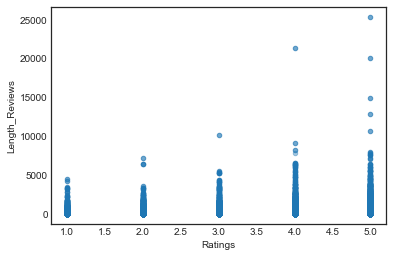

In [42]:
df2.plot(kind="scatter", x="Ratings", y="Length_Reviews", alpha=0.4)

Clearly visible that reviewers give lengthy reviews if they are highly satisfied/dissatisfied (1/4-5 stars). Nuetral reviewers do not comment much.

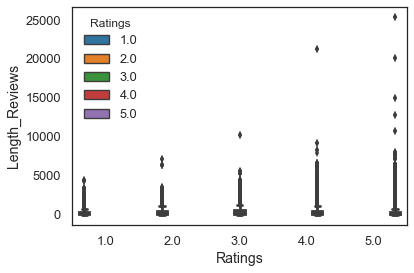

In [43]:
sns.set_context('poster',font_scale=0.8)
sns.boxplot(x="Ratings", y="Length_Reviews", hue="Ratings", data=df2)
plt.figure(figsize=(10,6)) 

All reviews had the average median word count (apx 70-80 words),
Spread word count observed in 5 star review.
Implies customer lengthy reviews when highly satisfied

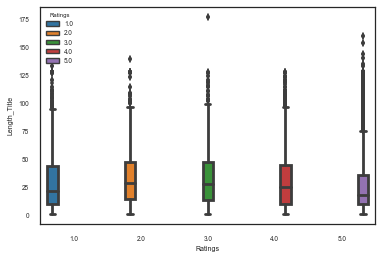

In [44]:
sns.set_context('poster',font_scale=0.4)
sns.boxplot(x="Ratings", y="Length_Title", hue="Ratings", data=df2)
plt.figure(figsize=(10,6)) 

5-star reviews had the lowest median word count (apx 15 words),
while 2-star reviews had the largest median word count (apx 30 words).
Exceptional(max) word count observed in 3 star review.

In [45]:
'''fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(df2['Ratings'], df2['Comments'],'b')
axes.set_xlabel('Ratings') # Notice the use of set_ to begin methods
axes.set_ylabel('Helpfulness_Level')
axes.set_title('Stars effects on Helpfulness')'''

"fig = plt.figure()\naxes = fig.add_axes([0.1, 0.1, 0.8, 0.8])\naxes.plot(df2['Ratings'], df2['Comments'],'b')\naxes.set_xlabel('Ratings') # Notice the use of set_ to begin methods\naxes.set_ylabel('Helpfulness_Level')\naxes.set_title('Stars effects on Helpfulness')"

Not a useful graph. 

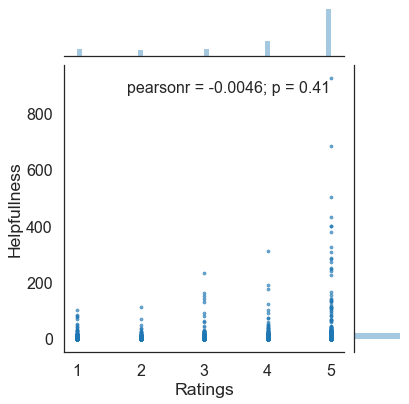

In [46]:
sns.set_context('poster',font_scale=1)
sns.jointplot(x='Ratings',y='Helpfullness',data=df2,kind='scatter', alpha = 0.4, s = 10)
plt.figure(figsize=(10,6)) 

The helpful reviews are high for extreme stars 1 or 5, may be co-related to length of reviews.

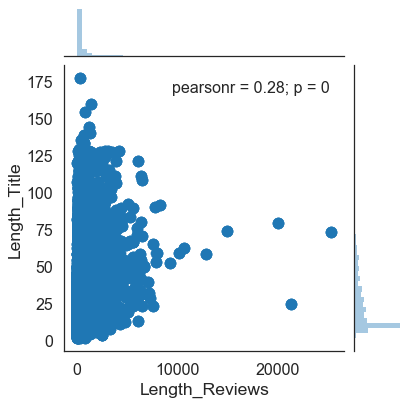

In [47]:
sns.set_context('poster',font_scale=1)
sns.jointplot(x='Length_Reviews',y='Length_Title',data=df2,kind='scatter')
plt.figure(figsize=(10,6)) 

Nuetral to Positively corelated , reviewers with lengthy title tends to do descriptive reviewing 

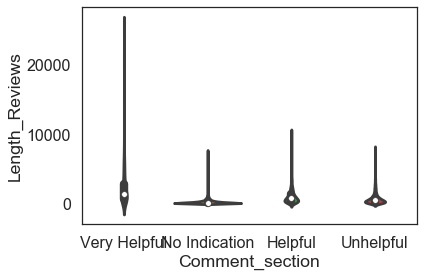

In [51]:
sns.violinplot(x='Comment_section', y='Length_Reviews', data=df2, alpha = 0.1, s= 10)
plt.figure(figsize = (10,6))

The word counts for helpful reviews and No indication reviews is bit more than unhelpful.
The greatest concentration of reviews of approximately 1500 words. 
However, unhelpful reviews have a larger concentration of reviews with 
low word count and helpful reviews have more longer reviews. Helpful reviews have a higher 
median word count (200 words) than unhelpful reviews (100 words).
The comment with max word count(aprx 1500) has highest concentration of helpfulness.

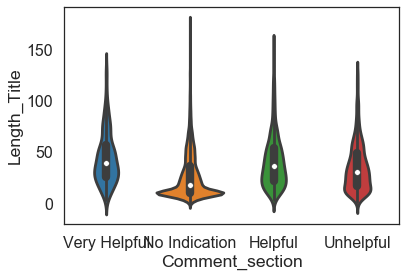

In [52]:
sns.violinplot(x='Comment_section', y='Length_Title', data=df2)

Most useful reviews have lenghy elaborative titles.

# Classification based on Neg/Pos Reviews

In [25]:
df1 = df2.copy()

In [26]:
df = df1.loc[:, ['Reviews','Ratings', 'Title']]

In [27]:
df.shape

(32604, 3)

In [28]:
df['Score'] = df['Ratings'].apply(lambda x : pd.to_numeric(x)).apply(lambda x : 'pos' if x > 3 else 'neg')

In [29]:
df = df.drop(['Ratings'], axis = 1)

Distribution of labels in the dataset

In [30]:
df.groupby('Score')['Reviews'].count()

Score
neg     8376
pos    24228
Name: Reviews, dtype: int64

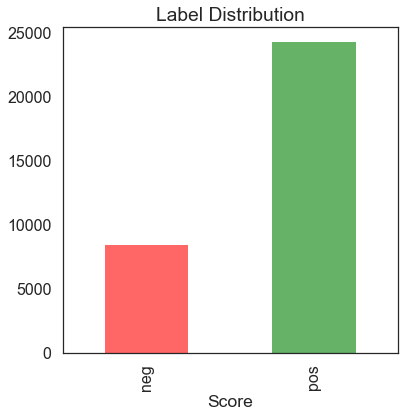

In [83]:
df.groupby('Score')['Reviews'].count().plot(kind='bar',color=['r','g'],title='Label Distribution',figsize=(6,6), alpha = 0.6)

As we can see the data is pretty skewed. We are able to already decide that we must use Stratified Split for evaluation

In [84]:
print ('Percentage of negative reviews %.2f %%' % ((df.groupby('Score')['Reviews'].count()['neg'])*100.0/len(df)))
print ('Percentage of positive reviews %.2f %%' % ((df.groupby('Score')['Reviews'].count()['pos'])*100.0/len(df)))

Percentage of negative reviews 25.69 %
Percentage of positive reviews 74.31 %


# Splitting the dataset based on labels

In [31]:
def splitPosNeg(Reviews):
    neg = df.loc[Reviews['Score']=='neg']
    pos = df.loc[Reviews['Score']=='pos']
    return [pos,neg]

In [32]:
[pos,neg] = splitPosNeg(df)

Tokenizing the training data to find frequency of words

In [33]:
nltk.download('stopwords')
nltk.download('wordnet')

NameError: name 'nltk' is not defined

In [88]:
lemmatizer = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
translation = str.maketrans(string.punctuation,' '*len(string.punctuation))

def preprocessing(line):
    tokens=[]
    line = line.translate(translation)
    line = nltk.word_tokenize(line.lower())
    for t in line:
        #if(t not in stop):
            #stemmed = stemmer.stem(t)
        stemmed = lemmatizer.lemmatize(t)
        tokens.append(stemmed)
    return ' '.join(tokens)

In [89]:
pos_data = []
neg_data = []
for p in pos['Reviews']:
    pos_data.append(preprocessing(p))
for n in neg['Reviews']:
    neg_data.append(preprocessing(n))

In [94]:
stopword = ['wa','s','or','if','a','for','in','i','it','these','they','have','this','are','the','and','to','my','you','so','of','by','with','is','on','that','be','headphone','sound','but','them','not','t','can']
pos_list = []
for line in pos_data:
    pword = nltk.word_tokenize(line)
    for p in pword:
        p = [x for x in pword if x not in stopword]
    pos_list.append(p)

positive =[]
for pword in pos_list:
    for p in pword:
        positive.append(p)
        
word_features_pos = nltk.FreqDist(positive)
print ('postive words:' + str(len(word_features_pos)))

postive words:13841


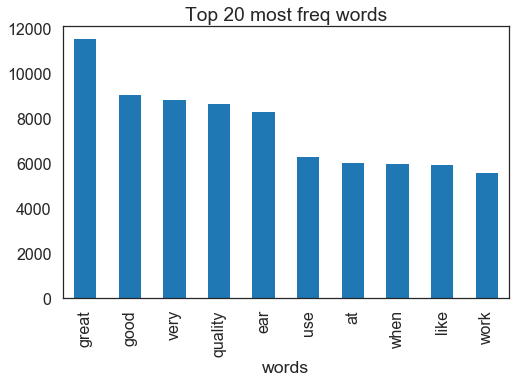

In [95]:
word_his = pd.DataFrame(word_features_pos.most_common(10),columns=['words','count'])
word_his.plot(kind='bar',x=word_his['words'],legend=False,title='Top 20 most freq words',figsize=((8,5)))

In [101]:
with open("pos_data.txt", "w") as output:
    output.write(str(pos_data))

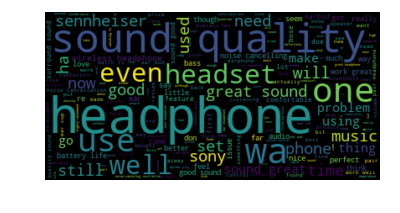

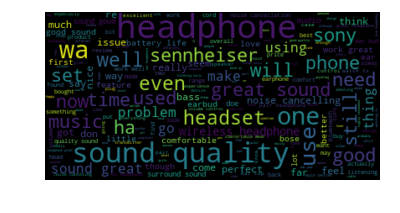

In [102]:
import os
from os import path
from wordcloud import WordCloud

# Read the whole text.
file1 = open("pos_data.txt","r")
text = file1.read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

We can see that the number of unique words in the dataset is pretty huge. 
When doing text classification the vocabulary of the data set becomes the featureset.

# Pre-Processing

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin

In [51]:
stop_words = {'headphone','sound','ear'}
class PartOfSpeechFilter(BaseEstimator, TransformerMixin):
    def __init__(self, pos_to_keep=('NOUN', 'ADJ'), stop_words=None):
        self.pos_to_keep = pos_to_keep
        self.stop_words = stop_words
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        preprocessed_sentences = []
        
        for doc in nlp.pipe(X, n_threads=8):
            if self.stop_words is not None:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep and t.lemma_ not in self.stop_words])
            else:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep])
            preprocessed_sentences.append(keep_tokens_string)
    
        return preprocessed_sentences 

# Splitting the data into train and test using a stratified strategy

In [37]:
data_review = df['Reviews']
labels = df['Score']

In [38]:
data_title = df['Title']
labels_1 = df['Score']

In [39]:
from sklearn.model_selection import train_test_split
[Data_train,Data_test,Train_labels,Test_labels] = train_test_split(data_review,labels, test_size=0.20, random_state=101,stratify=labels)
print(len(Data_train), "train +", len(Data_test), "test")

26083 train + 6521 test


In [40]:
from sklearn.model_selection import train_test_split
[Data_train_1,Data_test_1,Train_labels_1,Test_labels_1] = train_test_split(data_title,labels, test_size=0.20, random_state=101,stratify=labels)
print(len(Data_train_1), "train +", len(Data_test_1), "test")

26083 train + 6521 test


In [55]:
## use KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE,ADASYN

In [56]:
from imblearn.pipeline import Pipeline
text_clf = Pipeline([('posf', PartOfSpeechFilter(stop_words={'flash', 'light', 'flashlight', 'pron'})),
                     ('cv', CountVectorizer(lowercase=True, stop_words='english',ngram_range = (1, 2), analyzer = 'word')),
                     ('tfidf', TfidfTransformer(norm = 'l2',use_idf=True)),
                     #('sm' , SMOTE(random_state=101)),
                     ('ad', ADASYN(ratio='minority',n_neighbors=5,random_state=101)),
                     #('svd', TruncatedSVD(random_state=101)),
                     #('knn', KNN())]),
                     #('lr', LogisticRegression())])
                     #('nb', GaussianNB())])
                     #('lda', LinearDiscriminantAnalysis())])
                     ('KNN', KNeighborsClassifier())])
                     #('CART', DecisionTreeClassifier())])
                     #('clf', MultinomialNB(alpha=1.0))])
                     #('svm', SVC(C=1.0,kernel='linear',random_state=101))])
                     #('sgd', SGDClassifier(random_state=101))])
                     #('rfc', RandomForestClassifier(random_state=101))])
                     #('BernoulliNB', BernoulliNB())])
                     #('Logistic' , linear_model.LogisticRegression(C=1e5))])
                     #('Decision Tree' , DecisionTreeClassifier(random_state=101, criterion='entropy'))])
                     #('Perceptron', linear_model.Perceptron(n_iter=1000))])

In [44]:
#nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree')

In [45]:
#nbrs.fit(Data_train)  # 构造BallTree，可以快速找出6个最近邻居，原理待学习
#NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_neighbors=6, p=2, radius=1.0)

ValueError: could not convert string to float: 'i did alot of research before i purchased these headphones   i was a little concerned about the pairing issue i had seen in other posts   i purchased an additonal pair of headphones and had no issue pairing to the base   the sound is fantastic and i am very happy with the purchase   i would highly recommend this product'

In [47]:
knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')

In [48]:
knn.fit(Data_train, Train_labels)

ValueError: could not convert string to float: 'i did alot of research before i purchased these headphones   i was a little concerned about the pairing issue i had seen in other posts   i purchased an additonal pair of headphones and had no issue pairing to the base   the sound is fantastic and i am very happy with the purchase   i would highly recommend this product'

# Creating Pipeline - Model KNN

In [57]:
parameters = {
    #'cv__max_df': (1.0),
    #'cv__max_features': (100),
    'cv__ngram_range': (1, 2),  # unigrams or bigrams
    #'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1','l2'),
    'clf__alpha': (0.00001,0.0000001),
    #'clf__penalty': ('l2','l1'),
    #'clf__n_iter': (10, 50, 80),
}

# Training the model

In [243]:
#grid_search = GridSearchCV(text_clf, parameters, n_jobs=-1, verbose=1)

In [244]:
#grid_search.fit(Data_train, Train_labels)

In [58]:
text_clf.fit(Data_train, Train_labels)

Pipeline(memory=None,
     steps=[('posf', PartOfSpeechFilter(pos_to_keep=('NOUN', 'ADJ'),
          stop_words={'flashlight', 'flash', 'pron', 'light'})), ('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

# Evaluating the model

In [59]:
predicted = text_clf.predict(Data_test)
np.mean(predicted == Test_labels)

0.4767673669682564

CONFUSION MATRIX

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
conf_matrix = confusion_matrix(Test_labels, text_clf.predict(Data_test))
conf_matrix

array([[1596,   79],
       [3333, 1513]], dtype=int64)

In [73]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

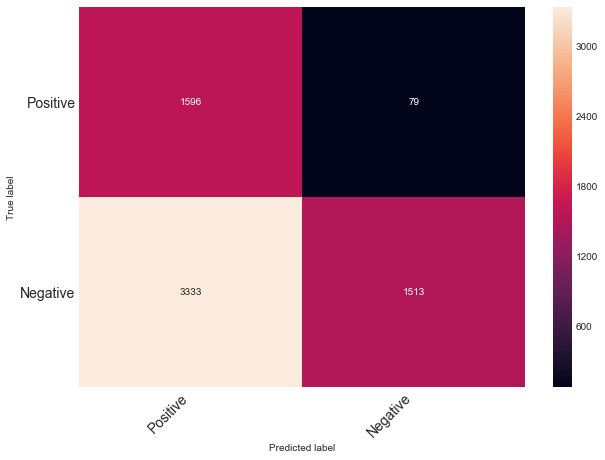

In [74]:
print_confusion_matrix(conf_matrix, ['Positive', 'Negative'])

In [67]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

In [72]:
import seaborn as sns